# Week 9 - Classification Metrics with KNN

KentB

In [18]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


**Try to predict wine quality**

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_good'],
      dtype='object')

In [5]:
# Define a simple binary feature for quality
df['quality_good'] = np.where(df.quality > 5, True, False)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


In [79]:
# Remove target columns from input data
X = df.iloc[:,:-2]
# Target data is in the very last column
target = df.iloc[:,-1]

In [15]:
# Can use correlation matrix to determine which features are most important
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_good
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


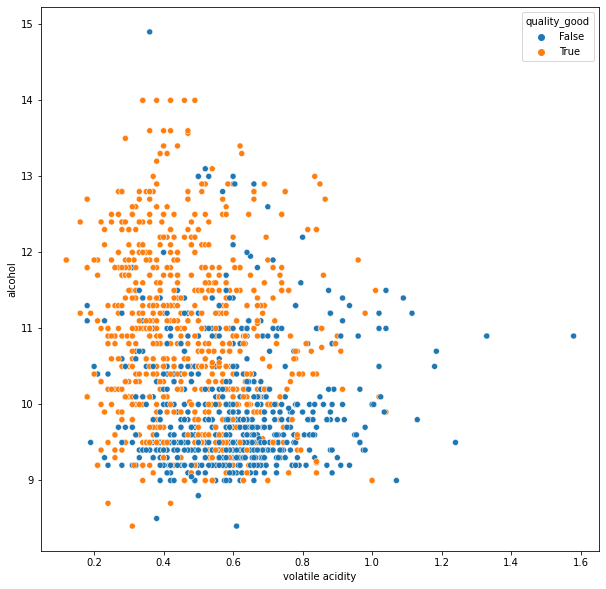

In [19]:
# Here we plot the best and worst correlations
#    as predictors of quality
plt.figure(figsize=(10,10))
sns.scatterplot('volatile acidity', 'alcohol', data = df, hue = 'quality_good')

## Try K-NN Prediction

In [8]:
from sklearn.preprocessing import StandardScaler

**Apply standard scaling**

Some algorithms prefer standard scaling due to the normal distribution around zero.

In [9]:
sd = StandardScaler()

In [10]:
X_scaled = sd.fit_transform(X)

**Build and fit classifier**

In [11]:
knn = KNeighborsClassifier(n_neighbors=9)

In [12]:
knn.fit(X_scaled, target)

KNeighborsClassifier(n_neighbors=9)

In [13]:
# Here's a rough prediction of distribution of results - fairly evenly split between good/bad wines
df.groupby('quality_good').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_good,,,,,,,,,,,,
False,744,744,744,744,744,744,744,744,744,744,744,744
True,855,855,855,855,855,855,855,855,855,855,855,855


**Run predictions**

*For classification do not use 'predict' - that would predict label values.*

In [21]:
# Get probability predictions
prob_pred = knn.predict_proba(X_scaled)

In [82]:
# Output is 2 cols - True and False - note that value of second is simply (1 minus value of first)
prob_pred

array([[1.        , 0.        ],
       [0.77777778, 0.22222222],
       [0.77777778, 0.22222222],
       ...,
       [0.11111111, 0.88888889],
       [0.55555556, 0.44444444],
       [0.        , 1.        ]])

In [24]:
# Extract 'true' values...
prob_pred_true = prob_pred[:,1]

In [26]:
# ...and inject into our dataset
df['pred_prob'] = prob_pred_true

*Now we have KNN-predicted probabilities in our original dataset - are they accurate?*

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_good,pred_prob
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False,0.000000
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False,0.222222
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False,0.222222
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True,0.333333
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False,0.000000


**Generate a Confusion Matrix**

Basic method of validating classification prediction results.

In [36]:
def CM(df, cutoff):
  df = df.copy()
  # Capture which prediction probabilities exceeded the 'True' cutoff - i.e are 'good'
  df['pred_good'] = (df['pred_prob'] >= cutoff)
  # Return grouped total counts which chart the 2x2 confusion matrix
  #    (ignore last 'quality', we just need a column to focus on for the count)
  return df.groupby(['quality_good', 'pred_good'])['quality'].count()

In [38]:
CM(df, 0.55)

quality_good  pred_good
False         False        542
              True         202
True          False        142
              True         713
Name: quality, dtype: int64

**Following is an optional off-the-shelf Confusion Matrix visualization**

In [83]:
from yellowbrick.classifier import confusion_matrix
# TODO
#confusion_matrix(X_scaled,...)

**Further Analysis of classification predictions - Recall, Precision, and ROC**

**Precision** =  TP/(TP + FP)        *(aka Sensitivity - does not like False Positives)*

**Recall** (TPR) = TP / (TP + FN)    *(aka Specificity - does not like False Negatives)*

**False Positive Rate** = FP/(FP + TN)  *(Note this is just the inversion of TPR)*

In [67]:
def RecallPrecision(df, cutoff):
  """
  Returns: Precision, Recall, and FPR
  """
  df = df.copy()
  # Capture which prediction probabilities exceeded the 'True' cutoff - i.e are 'good'
  df['pred_good'] = (df['pred_prob'] >= cutoff)
  # Collect grouped total counts which chart the 2x2 confusion matrix
  df_grouped = df.groupby(['quality_good', 'pred_good'])['quality'].count().reset_index().rename(columns={'quality':'count'})
  # Calculate True/False Positives, and True/False Negatives
  TP = df_grouped[(df_grouped['quality_good']==True) & (df_grouped['pred_good']==True)]['count'].min()
  FP = df_grouped[(df_grouped['quality_good']==False) & (df_grouped['pred_good']==True)]['count'].min()
  TN = df_grouped[(df_grouped['quality_good']==False) & (df_grouped['pred_good']==False)]['count'].min()
  FN = df_grouped[(df_grouped['quality_good']==True) & (df_grouped['pred_good']==False)]['count'].min()
  #print(f'TP: {TP}, FN: {FN}')
  return TP/(TP+FP), TP/(TP+FN), FP/(TN + FP)

In [57]:
RecallPrecision(df, 0.4)

(0.723463687150838, 0.9087719298245615, 0.39919354838709675)

In [58]:
RecallPrecision(df, 0.6)

(0.8382749326145552, 0.7274853801169591, 0.16129032258064516)

In [84]:
roc_data={}
# Store the recall and false pos rate
cutoffs = np.linspace(0.2,0.8,9)
cutoffs

array([0.2  , 0.275, 0.35 , 0.425, 0.5  , 0.575, 0.65 , 0.725, 0.8  ])

In [85]:
for i in cutoffs:
  _, recall, fpr = RecallPrecision(df, i)
  roc_data[fpr] = recall

TP: 850, N: 5
TP: 820, N: 35
TP: 777, N: 78
TP: 777, N: 78
TP: 713, N: 142
TP: 622, N: 233
TP: 622, N: 233
TP: 512, N: 343
TP: 371, N: 484


In [86]:
roc_data

{0.02956989247311828: 0.43391812865497076,
 0.0846774193548387: 0.5988304093567252,
 0.16129032258064516: 0.7274853801169591,
 0.271505376344086: 0.8339181286549707,
 0.39919354838709675: 0.9087719298245615,
 0.5604838709677419: 0.9590643274853801,
 0.7056451612903226: 0.9941520467836257}

## Graph the ROC Curve

X = FPR (false positive rate)

Y = Recall

The bigger the arc (Area Under Curve), the more preferred the model is.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


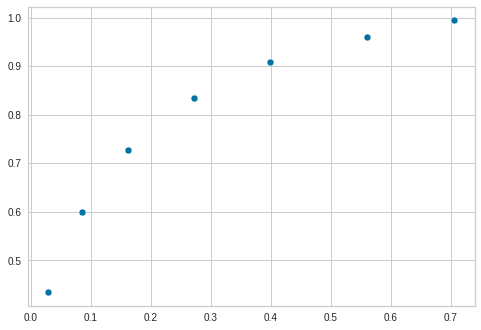

In [87]:
sns.scatterplot(roc_data.keys(), roc_data.values())